## Importing Required Libraries

In [1]:
#import general packages
import os
import argparse
import logging
import sys
from typing import Dict, List
from dpu_utils.utils.richpath import RichPath
import pickle

import torch
from tqdm import tqdm
import pandas as pd

# Setting up local details:
# This should be the location of the checkout of the THEMAP repository:
repo_path = os.path.dirname(os.path.abspath(""))
CHECKOUT_PATH = repo_path
DATASET_PATH = os.path.join(repo_path, "datasets")
EXT_CHEM_PATH = os.path.join(DATASET_PATH, "fsmol_hardness", "ext_chem")
PROTONET_PATH = os.path.join(DATASET_PATH, "fsmol_hardness", "FSMol_Eval_ProtoNet")
INTRA_HARDNESS_TRAIN_PATH = os.path.join(DATASET_PATH, "fsmol_hardness", "int_chem", "train")
INTRA_HARDNESS_TEST_PATH = os.path.join(DATASET_PATH, "fsmol_hardness", "int_chem", "test")

os.chdir(CHECKOUT_PATH)
sys.path.insert(0, CHECKOUT_PATH)

In [14]:
# import visualization packages
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
from themap.utils import compute_task_hardness_from_distance_matrix, normalize, internal_hardness, otdd_hardness


light_color = plt.get_cmap("plasma").colors[170]
dark_color = "black"

#matplotlib.use("pgf")

matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "font.serif": "Computer Modern Roman",
        "font.size": 20,
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)

In [15]:
available_otdd = ['otdd_Roberta-Zinc480M-102M',
                  'otdd_desc2D',
                  'otdd_gin_supervised_infomax',
                  'otdd_unimol',
                  'otdd_gin_supervised_contextpred',
                  'otdd_gin_supervised_masking',
]

protonet_16= os.path.join(PROTONET_PATH, 'summary', 'ProtoNet_summary_num_train_requested_16.csv')
protonet_32= os.path.join(PROTONET_PATH, 'summary', 'ProtoNet_summary_num_train_requested_32.csv')
protonet_64= os.path.join(PROTONET_PATH, 'summary', 'ProtoNet_summary_num_train_requested_64.csv')
protonet_128= os.path.join(PROTONET_PATH, 'summary', 'ProtoNet_summary_num_train_requested_128.csv')

dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1


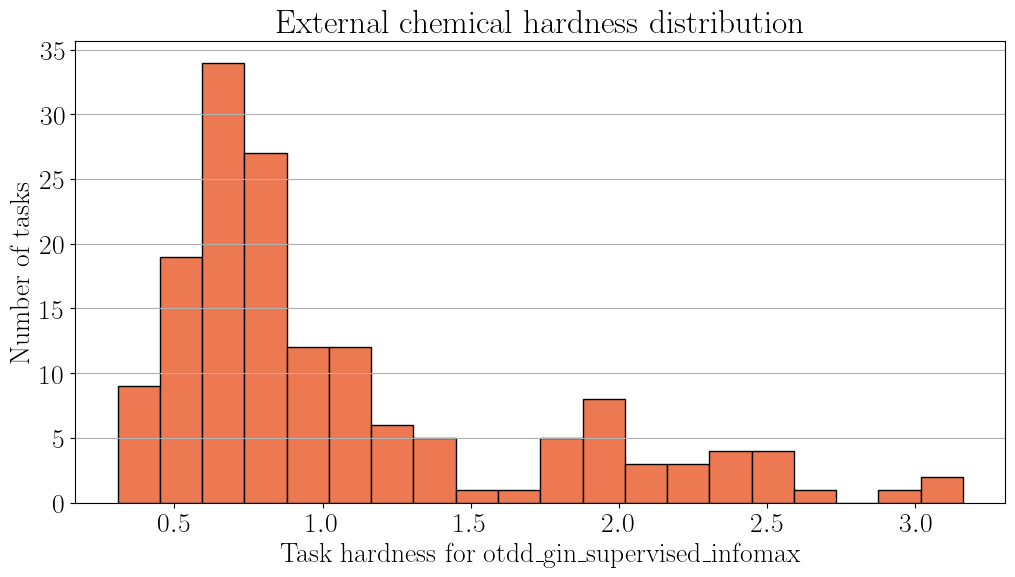

In [16]:
otdd_model = "otdd_gin_supervised_infomax"
intra_model = "rf_16.pkl"

PATH_TO_OTDD = os.path.join(EXT_CHEM_PATH, f'{otdd_model}.pkl')
PATH_TO_INTRA_HARDNESS = os.path.join(INTRA_HARDNESS_TRAIN_PATH, intra_model)

otdd_hardness_df = otdd_hardness(PATH_TO_OTDD, PATH_TO_INTRA_HARDNESS, k=10, train_tasks_weighted=True, weighting_method='rf')
otdd_hardness_df['hardness_norm'] = normalize(otdd_hardness_df['hardness']) 
# Visualizing the Hardness Distribution
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist(otdd_hardness_df['hardness'], bins=20, color=light_color, edgecolor=dark_color)
ax.set_title("External chemical hardness distribution")
ax.set_xlabel(f"Task hardness for {otdd_model}")
ax.set_ylabel("Number of tasks")
ax.grid(axis='y')

#ax.grid(True)
plt.show()

## Correlation plot between number of k-nearest source tasks and EXT_CHEM

dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1
dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1
dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1
dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1
dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1
dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1
dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1
dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1
[-0.6293434096531909, -0.627264909956921

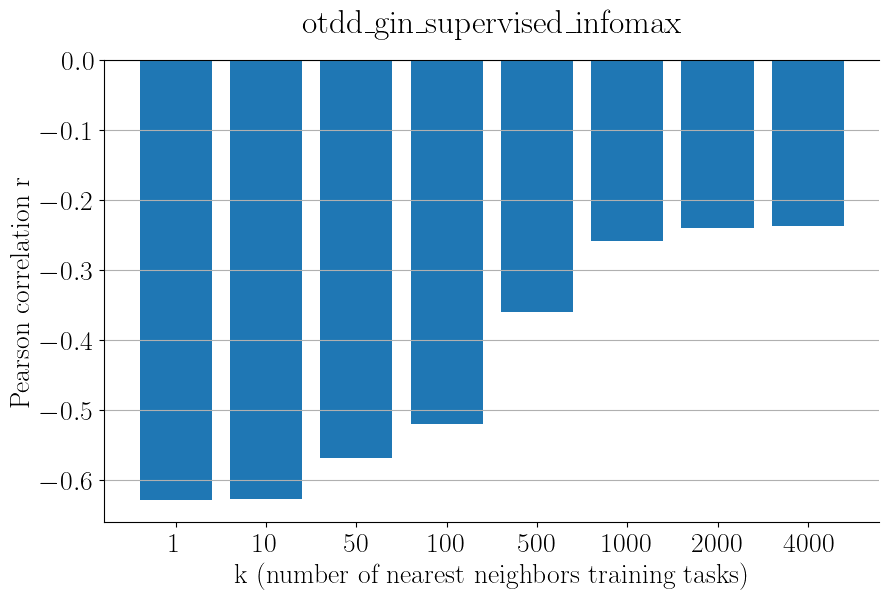

In [17]:
otdd_model = "otdd_gin_supervised_infomax"
PATH_TO_OTDD = os.path.join(EXT_CHEM_PATH, f'{otdd_model}.pkl')

protonet_results = pd.read_csv(protonet_128)

k = [1, 10, 50, 100, 500, 1000, 2000, 4000]
corr_diff_k = []
for item in k:
    otdd_hardness_df = otdd_hardness(PATH_TO_OTDD, PATH_TO_INTRA_HARDNESS, k=item, train_tasks_weighted=True, weighting_method='rf')
    otdd_hardness_df['hardness_norm'] =normalize(otdd_hardness_df['hardness']) 
    m = pd.merge(protonet_results[['assay', 'delta_auprc', 'roc_auc']], otdd_hardness_df, on="assay")
    corr_diff_k.append(m['hardness_norm'].corr(m['roc_auc']))

print(corr_diff_k)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar([str(i) for i in k], corr_diff_k)
ax.set_title(otdd_model, pad=20)
ax.set_xlabel('k (number of nearest neighbors training tasks)')
ax.set_ylabel('Pearson correlation r')

ax.grid(axis='y')
ax.spines['right'].set_visible(False)

plt.show()

## Correlation between OTDD with different moelcules features

dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1
dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  7
dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1
dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1
dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1
dict_keys(['train_chembl_ids', 'test_chembl_ids', 'distance_matrices'])
Numebr of NaN values in the hardness matrix:  1


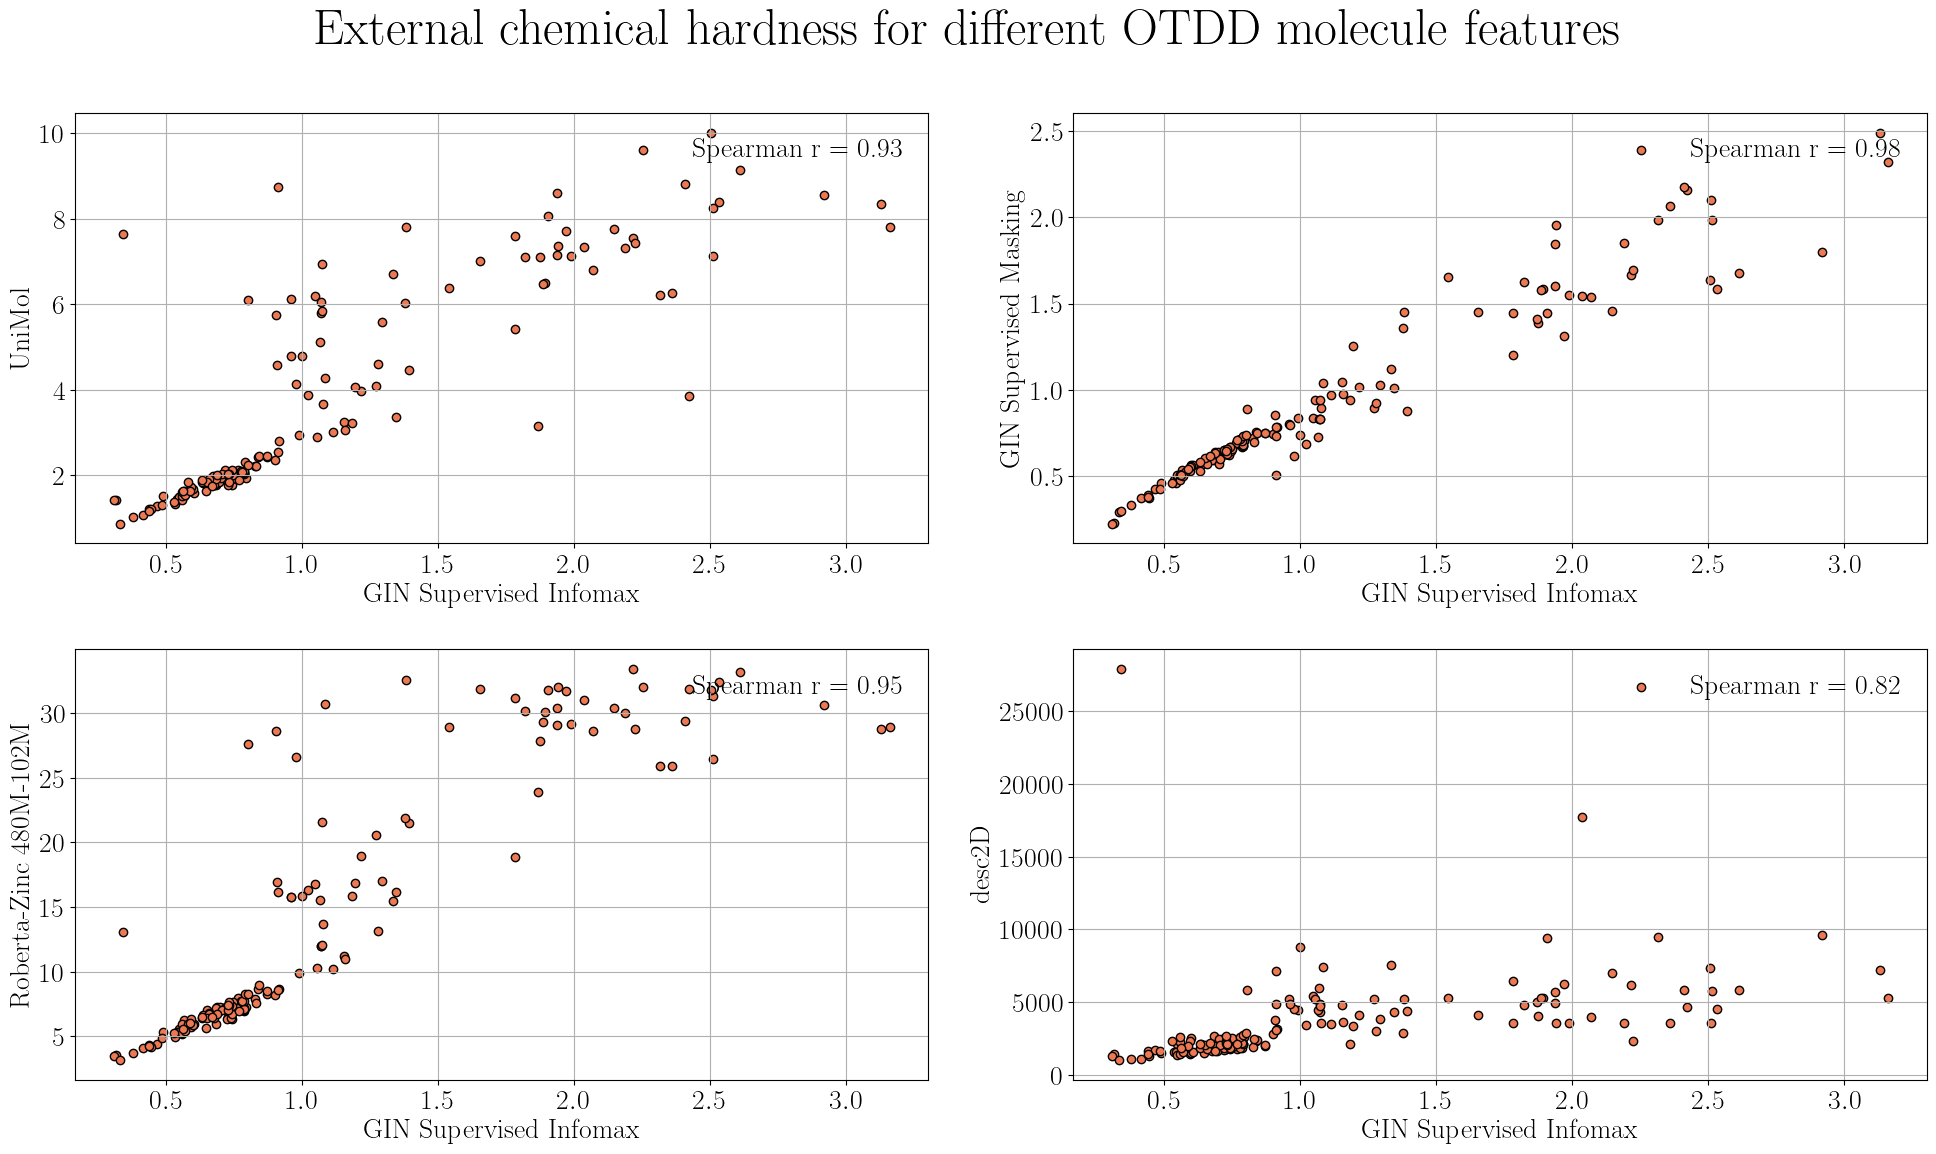

In [18]:

##Comparing different OTDD methods (for different feature types)
k = 10 
hardness_df_dict = {}

for otdd_model in available_otdd:
    PATH_TO_OTDD = os.path.join(EXT_CHEM_PATH, otdd_model)
    otdd_hardness_df = otdd_hardness(f'{PATH_TO_OTDD}.pkl', PATH_TO_INTRA_HARDNESS, k=k, train_tasks_weighted=True, weighting_method='rf')
    otdd_hardness_df['hardness_norm'] = normalize(otdd_hardness_df['hardness'])
    otdd_hardness_df.columns = [f'hardness_{otdd_model}', 'assay', f'hardness_norm_{otdd_model}']
    hardness_df_dict[otdd_model] = otdd_hardness_df


for model in available_otdd:
    if f'hardness_{model}' in otdd_hardness_df.columns:
        continue
    otdd_hardness_df = pd.merge(otdd_hardness_df, hardness_df_dict[model], on='assay', how='outer')


fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(20, 12))

fig.suptitle("External chemical hardness for different OTDD molecule features", fontsize=36)

ax0.scatter(otdd_hardness_df['hardness_otdd_gin_supervised_infomax'],  otdd_hardness_df['hardness_otdd_unimol'], color=light_color, edgecolor=dark_color)
#ax0.set_title("Task hardness for differet OTDD molecule features")
ax0.set_xlabel("GIN Supervised Infomax")
ax0.set_ylabel("UniMol")
sp_corr = round(otdd_hardness_df['hardness_otdd_gin_supervised_infomax'].corr( otdd_hardness_df['hardness_otdd_unimol'], method='spearman'), 2)
ax0.legend(['Spearman r = {}'.format(sp_corr)], loc='upper right', fontsize=20, frameon=False)
ax0.grid(True)

ax1.scatter(otdd_hardness_df['hardness_otdd_gin_supervised_infomax'],  otdd_hardness_df['hardness_otdd_gin_supervised_masking'], color=light_color, edgecolor=dark_color)
#ax1.set_title("Task hardness for differet OTDD molecule features")
ax1.set_xlabel("GIN Supervised Infomax")
ax1.set_ylabel("GIN Supervised Masking")
sp_corr = round(otdd_hardness_df['hardness_otdd_gin_supervised_infomax'].corr( otdd_hardness_df['hardness_otdd_gin_supervised_masking'], method='spearman'), 2)
ax1.legend(['Spearman r = {}'.format(sp_corr)], loc='upper right', fontsize=20, frameon=False)
ax1.grid(True)

ax2.scatter(otdd_hardness_df['hardness_otdd_gin_supervised_infomax'],  otdd_hardness_df['hardness_otdd_Roberta-Zinc480M-102M'], color=light_color, edgecolor=dark_color)
#ax2.set_title("Task hardness for differet OTDD molecule features")
ax2.set_xlabel("GIN Supervised Infomax")
ax2.set_ylabel("Roberta-Zinc 480M-102M")
sp_corr = round(otdd_hardness_df['hardness_otdd_gin_supervised_infomax'].corr( otdd_hardness_df['hardness_otdd_Roberta-Zinc480M-102M'], method='spearman'), 2)
ax2.legend(['Spearman r = {}'.format(sp_corr)], loc='upper right', fontsize=20, frameon=False)
ax2.grid(True)

ax3.scatter(otdd_hardness_df['hardness_otdd_gin_supervised_infomax'],  otdd_hardness_df['hardness_otdd_desc2D'], color=light_color, edgecolor=dark_color)
#ax3.set_title("Task hardness for differet OTDD molecule features")
ax3.set_xlabel("GIN Supervised Infomax")
ax3.set_ylabel("desc2D")
sp_corr = round(otdd_hardness_df['hardness_otdd_gin_supervised_infomax'].corr( otdd_hardness_df['hardness_otdd_desc2D'], method='spearman'), 2)
ax3.legend(['Spearman r = {}'.format(sp_corr)], loc='upper right', fontsize=20, frameon=False)
ax3.grid(True)

fig.tight_layout(pad=1.5)
#fig.savefig('assets/Hardness_vs_ProtoNet.pdf', transparent=True, backend='pgf', bbox_inches='tight')
plt.show()

